In [2]:
import sys
sys.path.append('../ETL/')

import pandas as pd
import numpy as np
from mvesc_utility_functions import postgres_pgconnection_generator
from mvesc_utility_functions import read_table_to_df
import pandas as pd
import json
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set(color_codes=True)

matplotlib.style.use('ggplot')
%matplotlib inline

In [4]:
# Read data into pd.dataframe
with postgres_pgconnection_generator() as con:
    df_oaaogt = read_table_to_df(con, 'oaaogt', schema='clean', nrows=-1)

# convert scores to numeric data
ss_cols = list(filter(lambda x: x[-3:]=='_ss', df_oaaogt.columns ) )
df_oaaogt[ss_cols] = df_oaaogt[ss_cols].apply(pd.to_numeric, errors='coerce')

In [5]:
df_oaaogt.head()

,student_lookup,dob,gender,ethnicity,kral,kral_pl,third_read_pl,third_read_ss,third_math_pl,third_math_ss,...,ogt_read_pl,ogt_read_ss,ogt_math_pl,ogt_math_ss,ogt_write_pl,ogt_write_ss,ogt_science_pl,ogt_science_ss,ogt_socstudies_pl,ogt_socstudies_ss
0,27314,2002-10-16,M,White,23.0,Targeted,Advanced,441.0,Proficient,419.0,...,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN
1,69037,1990-12-01,F,White,NaN,None,None,NaN,None,NaN,...,Proficient,423.0,Accelerated,429.0,Accelerated,433.0,Accelerated,428.0,Proficient,413.0
2,62219,1990-03-25,F,White,NaN,None,None,NaN,None,NaN,...,Accelerated,430.0,Proficient,403.0,Accelerated,457.0,Proficient,413.0,Proficient,416.0
3,57875,1991-12-12,M,White,NaN,None,None,NaN,None,NaN,...,None,NaN,None,NaN,None,NaN,None,NaN,None,NaN
4,43401,1996-10-08,F,Asian/Pacific Islander,NaN,None,None,NaN,None,NaN,...,Advanced,451.0,Accelerated,428.0,Accelerated,430.0,Proficient,405.0,Proficient,415.0


In [6]:
df_oaaogt.dtypes

student_lookup            int64
dob                      object
gender                   object
ethnicity                object
kral                    float64
kral_pl                  object
third_read_pl            object
third_read_ss           float64
third_math_pl            object
third_math_ss           float64
fourth_read_pl           object
fourth_read_ss          float64
fourth_math_pl           object
fourth_math_ss          float64
fourth_write_pl          object
fourth_write_ss         float64
fourth_ctz_pl            object
fourth_ctz_ss           float64
fourth_science_pl        object
fourth_science_ss       float64
fifth_read_pl            object
fifth_read_ss           float64
fifth_math_pl            object
fifth_math_ss           float64
fifth_socstudies_pl      object
fifth_socstudies_ss     float64
fifth_science_pl         object
fifth_science_ss        float64
sixth_read_pl            object
sixth_read_ss           float64
                         ...   
sixth_wr

# General Stats
 - Number of unique students: 46419

In [7]:
print("Number of unique students: ", df_oaaogt.student_lookup.unique().size)
print("Number of students with 2 or more rows: ", (df_oaaogt.student_lookup.value_counts()>=2).sum())

Number of unique students:  46419
Number of students with 2 or more rows:  1485


In [8]:
def plot_group_counts(df, col, figsize=(8, 4), barlabel=True):
    """ get the number of students for each group
    
    :param string col: column name
    :param pg.connection connection: sql connection
    :param string table: table name
    :param list out_rows: rows of values to rule out 
    :return dataframe: data frame of distinct counts
    :rtype pandas.dataframe
    """
    dfcnt = df[col].value_counts().to_frame(name='count')
    #col = col.lower()
    #df.index = df[col]
    #row2keep = [row not in out_rows for row in df.iloc[:,0]]
    #df = df.iloc[row2keep, :]
    dfcnt = dfcnt.sort_values(['count'], ascending=False)
    level_ind = ['Advanced', 'Accelerated', 'Proficient', 'Basic', 'Limited', '99']
    if dfcnt.index[0] in level_ind:
        dfcnt = dfcnt.ix[level_ind]
    plt.figure()
    ax = dfcnt['count'].plot(kind='bar', title=col.capitalize(), figsize=figsize, fontsize=16)
    if barlabel:
        for p in ax.patches:
            ax.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=15)
    return dfcnt

def plot_score_hist(df, col, bins=25, figsize=(8, 4)):
    """ Histogram plot of numeric scores
    
    """
    plt.figure()
    df.hist(column=col, bins=bins, figsize=figsize)
    return None

def plot_both_sspl(df, col, figsize=(8, 4), barlabel=True, bins=25):
    """ Plot both score_histogram and performance level counts
    
    """
    colss = col+'_ss'
    colpl = col+'_pl'
    plot_group_counts(df, colpl, figsize=figsize, barlabel=barlabel)
    plot_score_hist(df, colss, bins=bins, figsize=figsize)
    return None
#plot_group_counts(df_oaaogt, 'gender')
#plot_group_counts(df_oaaogt, 'ethnicity')


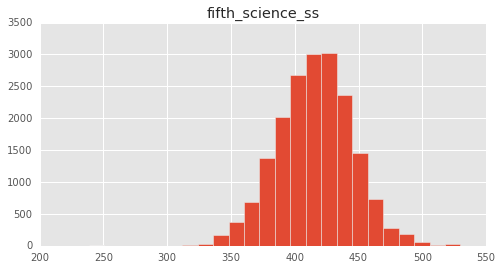

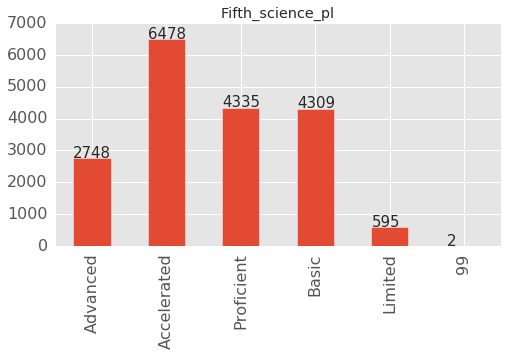

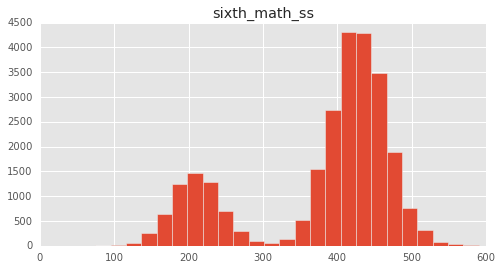

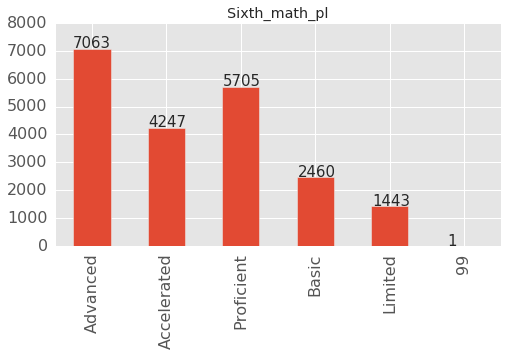

In [10]:
# Plots to save for slides
df = plot_score_hist(df_oaaogt, 'fifth_science_ss')
plt.savefig("fifth_science_ss_hist.png", dpi=400)
plot_group_counts(df_oaaogt, 'fifth_science_pl')
plt.savefig("fifth_science_pl_hist.png", dpi=400)

df = plot_score_hist(df_oaaogt, 'sixth_math_ss')
plt.savefig("sixth_math_ss_hist.png", dpi=400)
plot_group_counts(df_oaaogt, 'sixth_math_pl')
plt.savefig("six_math_pl_hist.png", dpi=400)

/home/jgutman/env/lib/python3.4/site-packages/matplotlib/pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


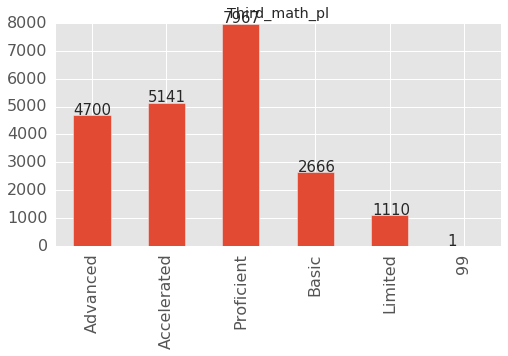

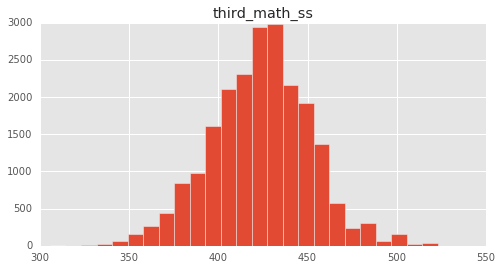

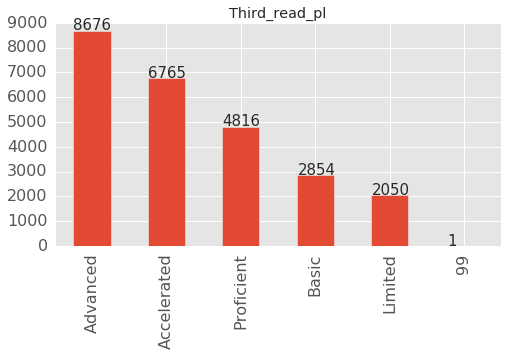

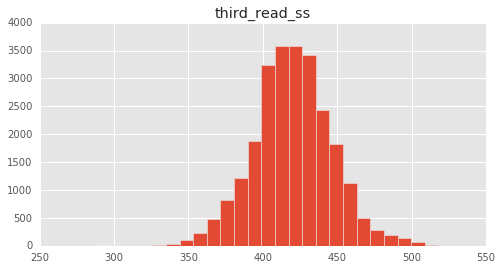

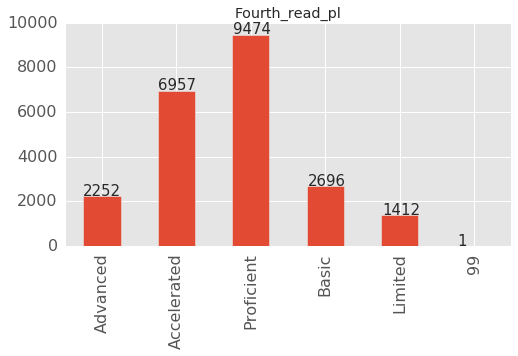

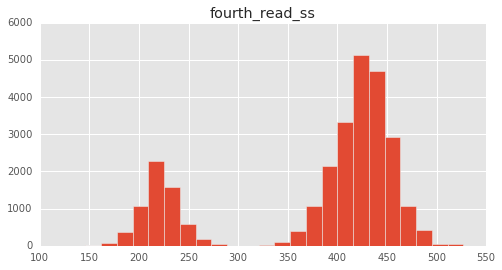

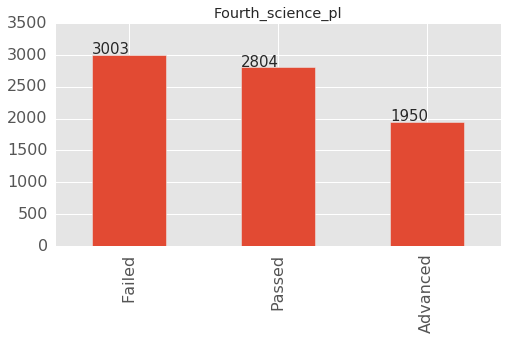

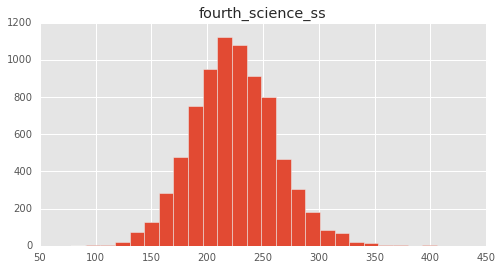

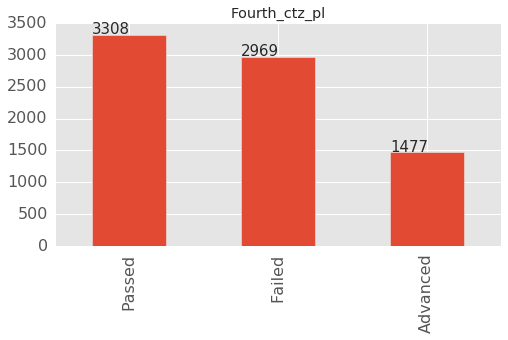

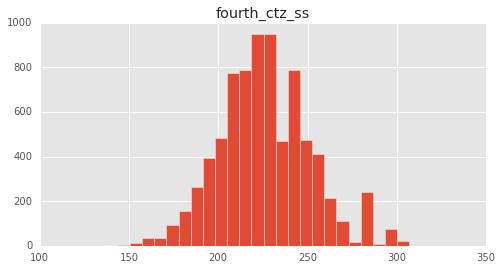

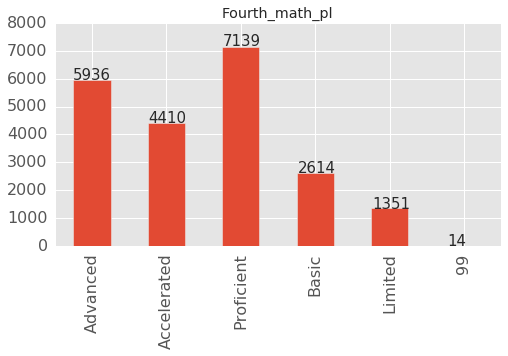

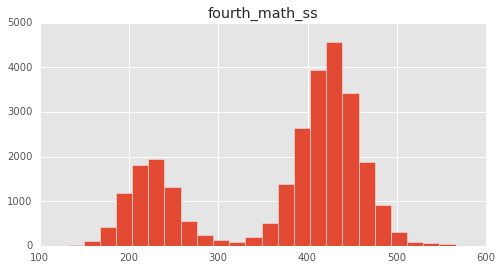

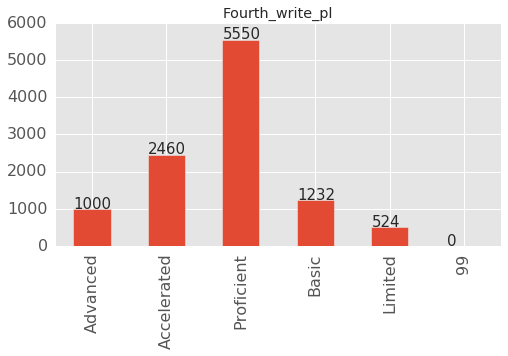

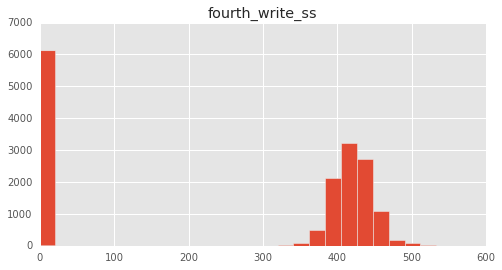

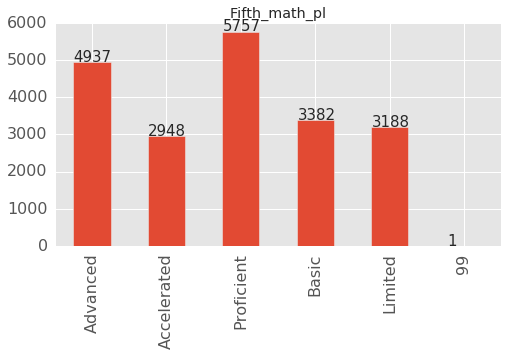

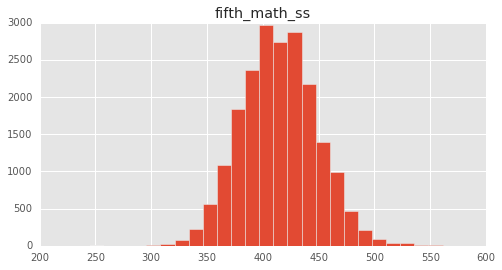

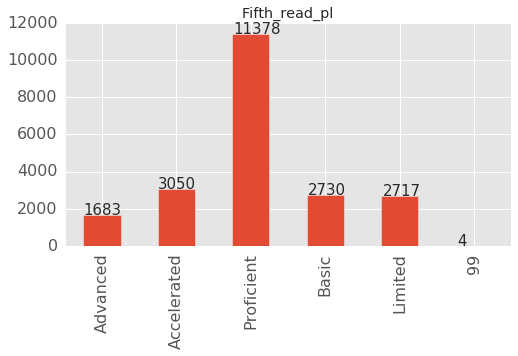

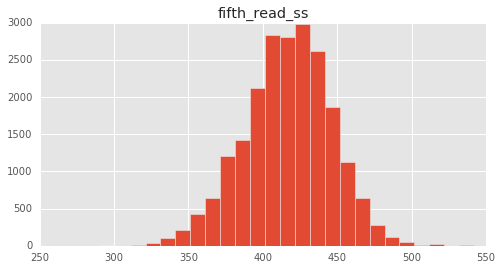

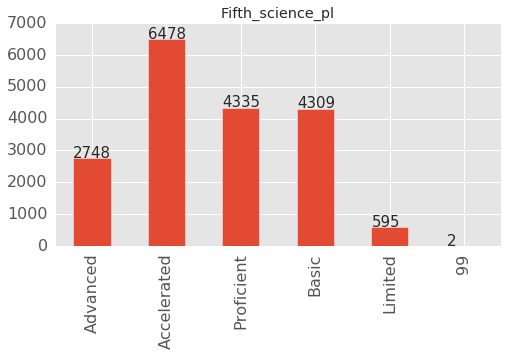

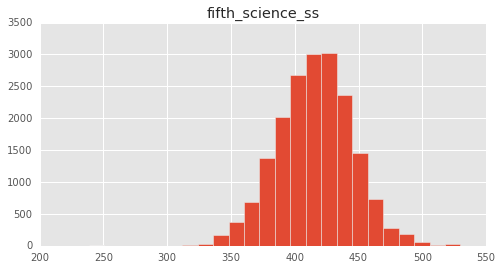

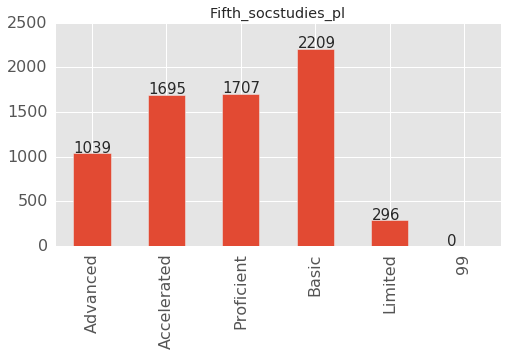

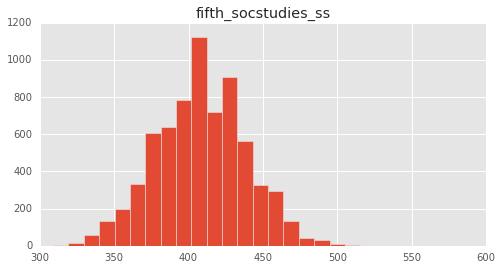

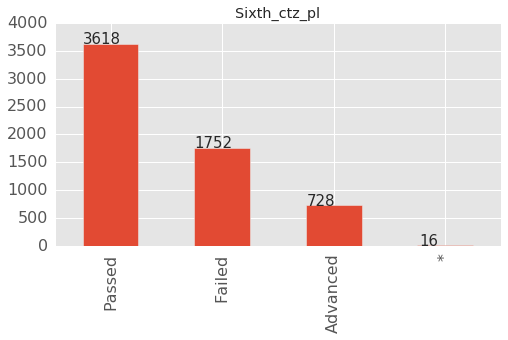

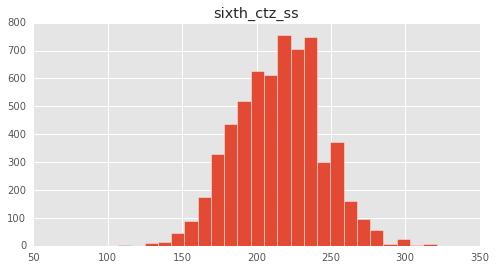

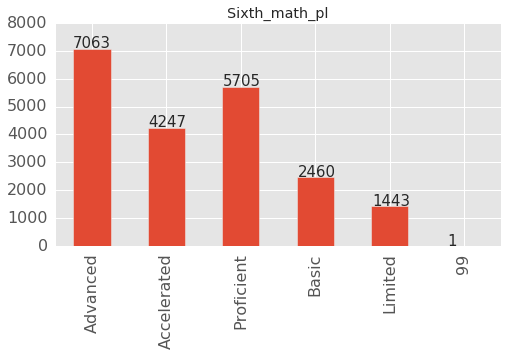

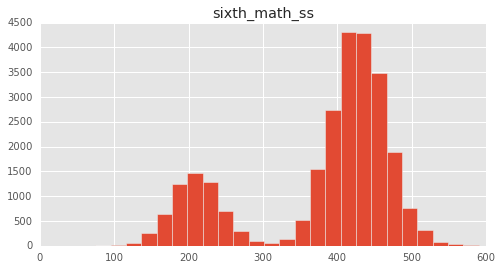

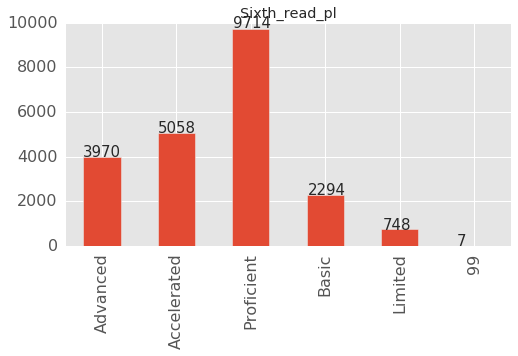

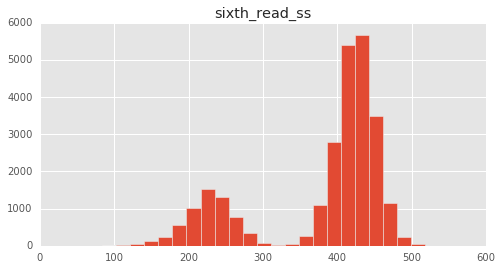

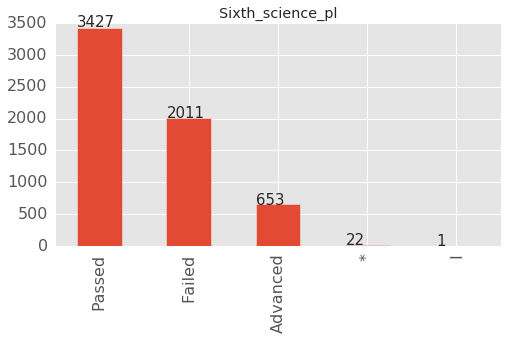

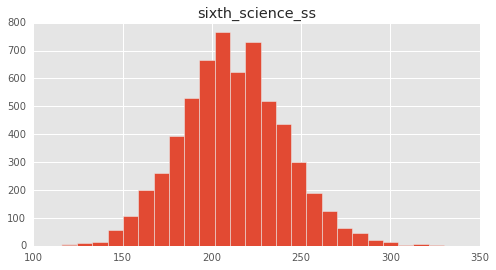

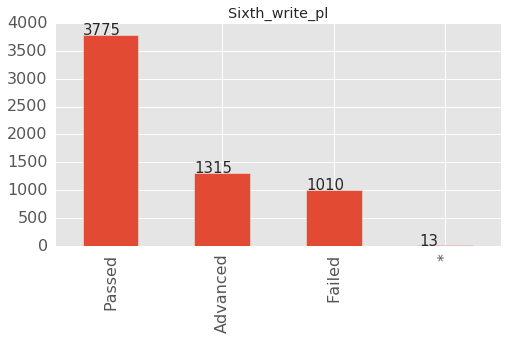

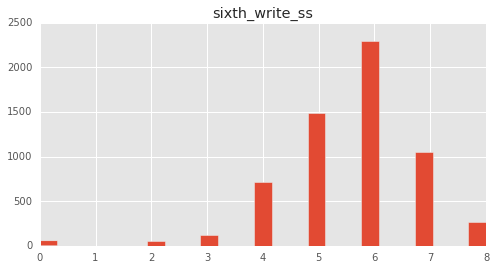

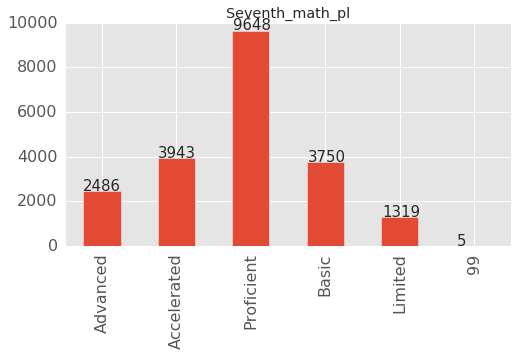

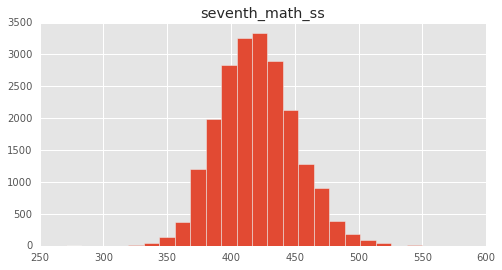

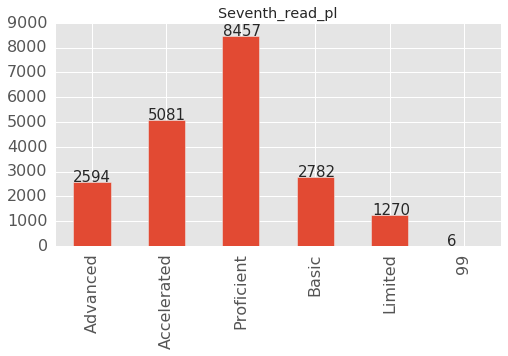

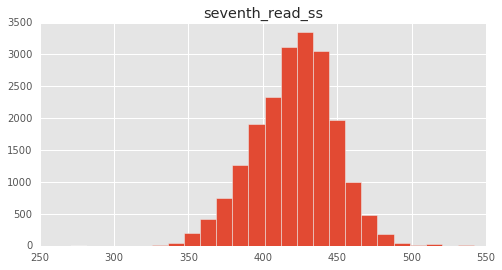

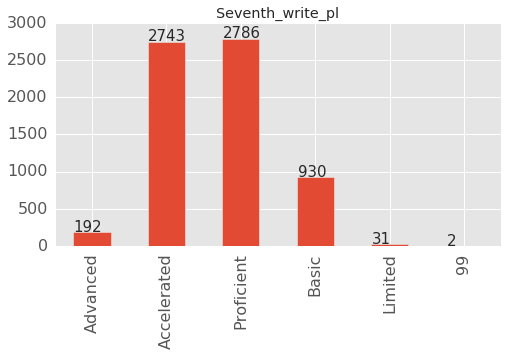

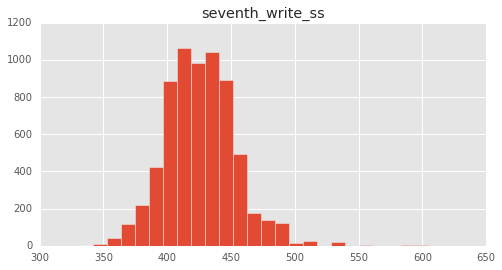

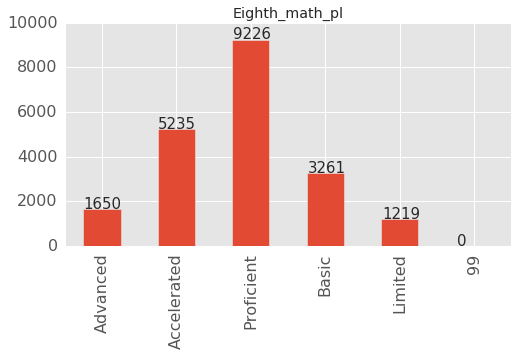

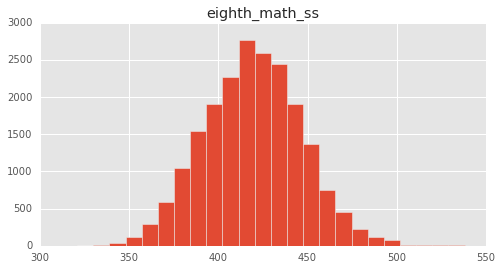

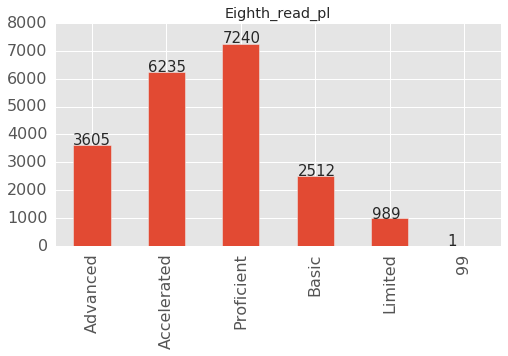

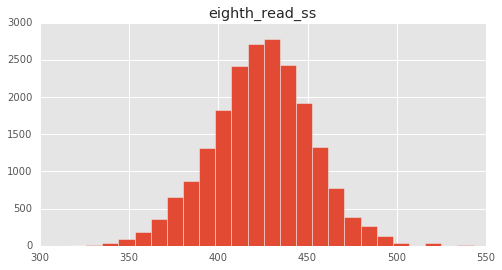

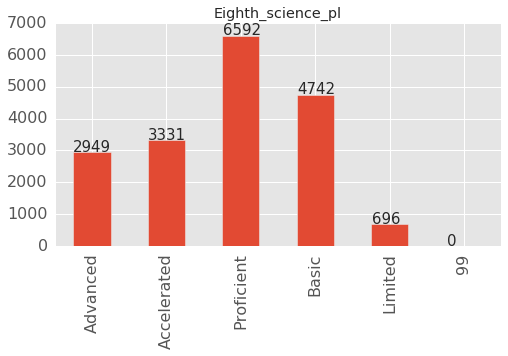

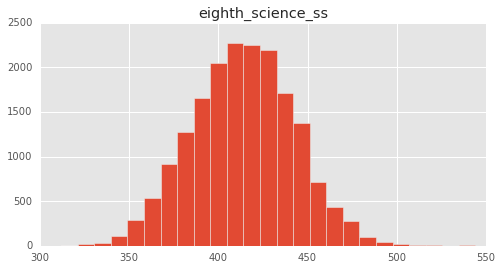

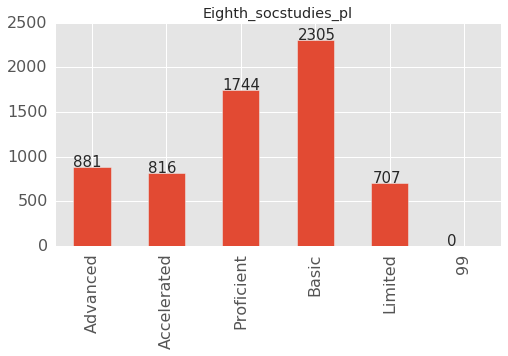

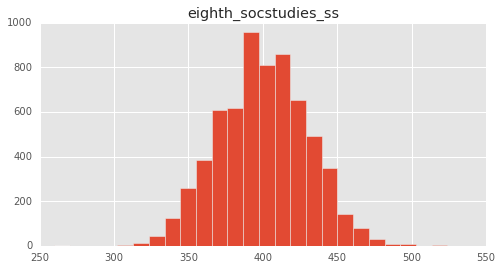

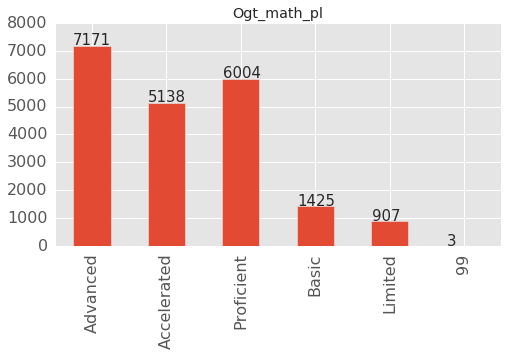

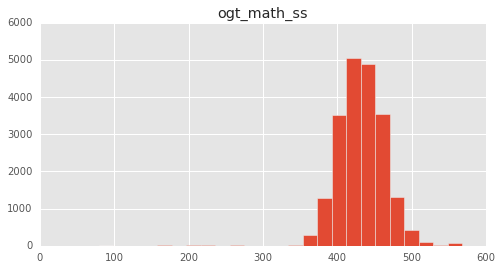

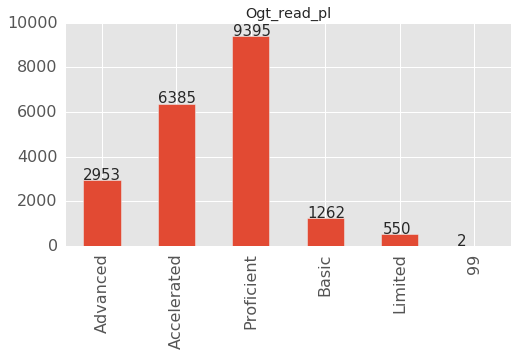

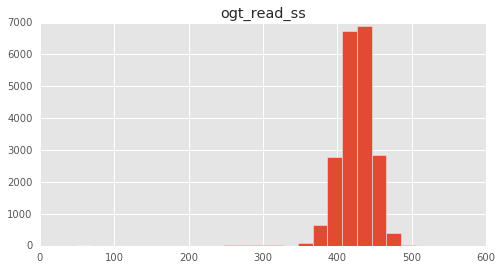

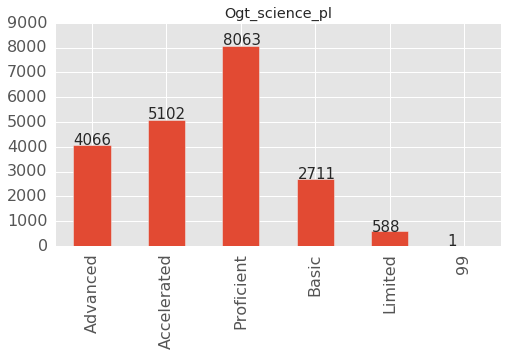

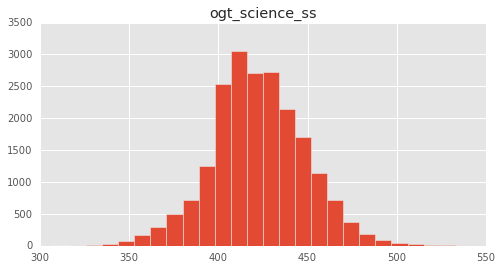

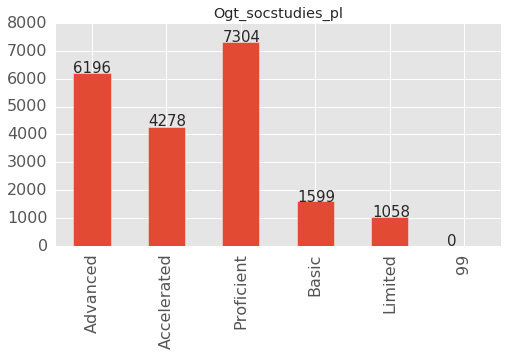

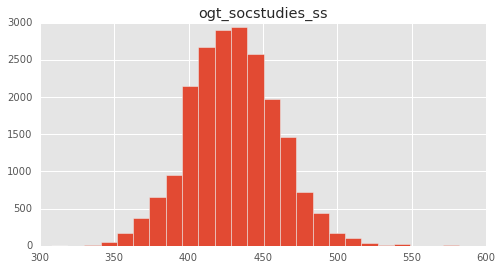

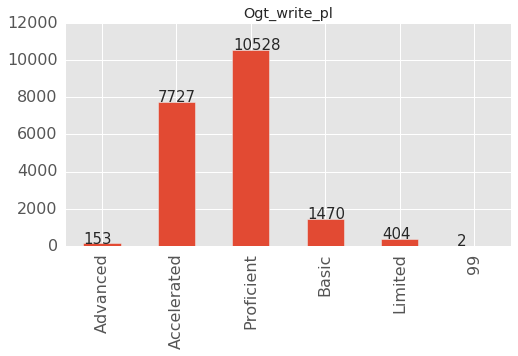

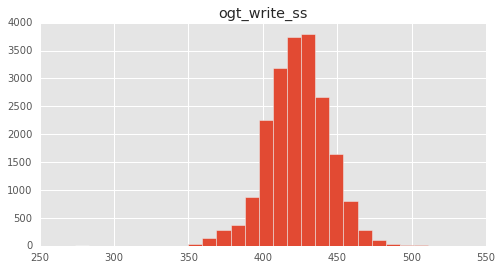

In [11]:
#plot_group_counts(df_oaaogt, 'kral', barlabel=False)
#plot_group_counts(df_oaaogt, 'kral_pl')
sspl_cols = np.unique([col[:-3] for col in df_oaaogt.columns[6:]])
sspl_cols =  ['third_math', 'third_read', 
              'fourth_read', 'fourth_science', 'fourth_ctz', 'fourth_math','fourth_write', 
              'fifth_math', 'fifth_read', 'fifth_science', 'fifth_socstudies',
              'sixth_ctz', 'sixth_math', 'sixth_read','sixth_science', 'sixth_write', 
              'seventh_math', 'seventh_read', 'seventh_write', 
              'eighth_math', 'eighth_read', 'eighth_science', 'eighth_socstudies',
              'ogt_math', 'ogt_read', 'ogt_science', 'ogt_socstudies', 'ogt_write']
for col in sspl_cols:
    plot_both_sspl(df_oaaogt, col=col)

In [13]:
cor_ss = df_oaaogt[ss_cols].corr()

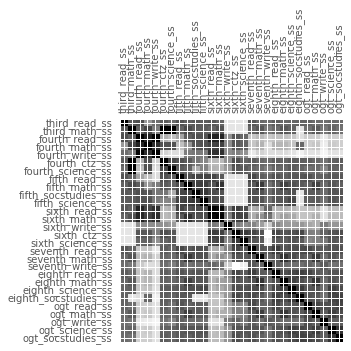

In [17]:
plt.figure(figsize=(16, 16))
plt.matshow(cor_ss)
plt.xticks(range(len(cor_ss.columns)), cor_ss.columns, rotation=90);
plt.yticks(range(len(cor_ss.columns)), cor_ss.columns);
#plt.savefig("cor.png", dpi=500)

In [193]:
cor_ss

,third_math_ss,third_read_ss,fourth_read_ss,fourth_science_ss,fourth_ctz_ss,fourth_math_ss,fourth_write_ss,fifth_math_ss,fifth_read_ss,fifth_science_ss,...,seventh_write_ss,eighth_math_ss,eighth_read_ss,eighth_science_ss,eighth_socstudies_ss,ogt_math_ss,ogt_read_ss,ogt_science_ss,ogt_socstudies_ss,ogt_write_ss
third_math_ss,1.000000,0.674618,0.638726,1.000000,1.000000,0.742572,0.511563,0.725650,0.620687,0.655930,...,0.527664,0.674815,0.595747,0.630582,NaN,0.655076,0.568299,0.614950,0.559869,0.532554
third_read_ss,0.674618,1.000000,0.715708,0.592702,0.658357,0.398925,0.576802,0.628198,0.691498,0.650927,...,0.574364,0.606015,0.648637,0.615480,0.625039,0.587799,0.624925,0.594988,0.588107,0.569002
fourth_read_ss,0.638726,0.715708,1.000000,0.239971,0.302694,0.866215,0.977774,0.651385,0.355553,0.699025,...,0.192035,0.231583,0.233820,0.204178,0.078545,0.166387,0.178838,0.170079,0.169818,0.010434
fourth_science_ss,1.000000,0.592702,0.239971,1.000000,0.738186,0.704389,0.082362,0.618546,0.652657,0.482890,...,0.503024,0.599685,0.604481,0.654218,0.618495,0.587295,0.565310,0.627915,0.617729,0.466808
fourth_ctz_ss,1.000000,0.658357,0.302694,0.738186,1.000000,0.696775,0.143959,0.656640,0.701144,0.474438,...,0.573644,0.615216,0.641184,0.650892,0.647369,0.606556,0.637612,0.628955,0.649221,0.547913
fourth_math_ss,0.742572,0.398925,0.866215,0.704389,0.696775,1.000000,0.816942,0.408844,0.242823,0.704482,...,0.085507,0.280864,0.292252,0.229438,0.605142,0.208821,0.166858,0.190677,0.163377,-0.014134
fourth_write_ss,0.511563,0.576802,0.977774,0.082362,0.143959,0.816942,1.000000,0.508436,0.091779,0.515310,...,0.087329,0.104812,0.087795,0.054604,-0.043192,0.061300,0.062303,0.055200,0.052245,-0.085929
fifth_math_ss,0.725650,0.628198,0.651385,0.618546,0.656640,0.408844,0.508436,1.000000,0.713589,0.767221,...,0.550824,0.757415,0.648235,0.705159,0.667356,0.751918,0.626302,0.688939,0.634277,0.587511
fifth_read_ss,0.620687,0.691498,0.355553,0.652657,0.701144,0.242823,0.091779,0.713589,1.000000,0.747047,...,0.617616,0.638917,0.694721,0.671089,0.680832,0.632880,0.697344,0.668292,0.671683,0.629584
fifth_science_ss,0.655930,0.650927,0.699025,0.482890,0.474438,0.704482,0.515310,0.767221,0.747047,1.000000,...,0.561420,0.678833,0.680191,0.739254,NaN,0.654697,0.642051,0.699187,0.659192,0.560858
